<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">  

<b> <font size='5'>  
PROJECT THREE: &nbsp; Sub-reddit Post Classification<br> </font>  

<font size='4'>Separating Science-Fact From Science-Fiction </font> </b>

<font size='3'>  
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Manu Kalia Project Submission<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; DSI-7-SF<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 08-Apr-2019<br>
</font>

---


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Executive-Summary" data-toc-modified-id="Executive-Summary-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Executive Summary</a></span></li><li><span><a href="#Begin-with-Importing-Required-Modules:" data-toc-modified-id="Begin-with-Importing-Required-Modules:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Begin with Importing Required Modules:</a></span></li><li><span><a href="#Get-the-Sub-reddits" data-toc-modified-id="Get-the-Sub-reddits-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Get the Sub-reddits</a></span></li><li><span><a href="#Inspect-the-Data" data-toc-modified-id="Inspect-the-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Inspect the Data</a></span></li><li><span><a href="#Clean-the-Data-and-Count-Vectorize" data-toc-modified-id="Clean-the-Data-and-Count-Vectorize-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Clean the Data and Count Vectorize</a></span></li><li><span><a href="#Fit-and-Score-Nine-Different-Models:" data-toc-modified-id="Fit-and-Score-Nine-Different-Models:-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Fit and Score Nine Different Models:</a></span></li><li><span><a href="#Hyper-parameter-Tuning" data-toc-modified-id="Hyper-parameter-Tuning-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Hyper-parameter Tuning</a></span></li><li><span><a href="#Wordclouds-and-Word-Counts" data-toc-modified-id="Wordclouds-and-Word-Counts-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Wordclouds and Word Counts</a></span></li><li><span><a href="#Model-Interpretations" data-toc-modified-id="Model-Interpretations-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Model Interpretations</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

---

### Problem Statement

---

### Executive Summary

---

### Begin with Importing Required Modules:

In [1]:
# module imports cell

import requests
import pandas as pd
import time

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# from pactools.grid_search import GridSearchCVProgressBar

import regex as re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

---

###  Get the Sub-reddits
<br/>
<font size='2'>  

&nbsp; &nbsp; &nbsp; See the separate subnotebook in this directory... `Project_3_Manu_Kalia_Solution_Data_Gathering_Subnotebook`.  
&nbsp; &nbsp; &nbsp; Read in the .csv files that were created in that subnotebook.

</font>

In [2]:
scifi_posts = pd.read_csv('./data/scifi_posts.csv')
scifi_posts.head()

,title,selftext,post
0,[Announcement] -- Saturdays are now officially...,"We want fresh, new content, original content b...",[Announcement] -- Saturdays are now officially...
1,I just watched Oblivion yet again. I love this...,"\n\nI love this movie flaws and all, or what ...",I just watched Oblivion yet again. I love this...
2,Why was there no sequel to Tron Legacy?,Howcome we never got a sequel to Tron Legacy?,Why was there no sequel to Tron Legacy? Howcom...
3,Tonight on Sci-Fi Monday we're watching Gas-s-...,NaN,Tonight on Sci-Fi Monday we're watching Gas-s-...
4,"I don't understand why ""Valerian the city of a...",Title says it all . I love that movie. \n\n...,"I don't understand why ""Valerian the city of a..."


In [3]:
starwars_posts = pd.read_csv('./data/starwars_posts.csv')
starwars_posts.head()

,title,selftext,post
0,Banner contest voting thread,Thank you to everyone who submitted a banner!\...,Banner contest voting thread Thank you to ever...
1,PSA: Bashing other sub is not tolerated here.,A reminder that using other subs as an excuse ...,PSA: Bashing other sub is not tolerated here. ...
2,One of my all-time favorite photos. (I used a ...,NaN,One of my all-time favorite photos. (I used a ...
3,One of my favorite subtle moments in the serie...,NaN,One of my favorite subtle moments in the serie...
4,Leaked villain for episode 9,NaN,Leaked villain for episode 9


In [4]:
physics_posts = pd.read_csv('./data/physics_posts.csv')
physics_posts.head()

,title,selftext,post
0,"Physics Questions Thread - Week 12, 2019",**Tuesday Physics Questions: 26-Mar-2019**\n\n...,"Physics Questions Thread - Week 12, 2019 **Tue..."
1,"Careers/Education Questions Thread - Week 12, ...",**Thursday Careers &amp; Education Advice Thre...,"Careers/Education Questions Thread - Week 12, ..."
2,Astronomers discover 2nd galaxy without dark m...,NaN,Astronomers discover 2nd galaxy without dark m...
3,"From 1 April onwards, the home page of CERN wi...",NaN,"From 1 April onwards, the home page of CERN wi..."
4,3blue1brown has finally started a series on Di...,NaN,3blue1brown has finally started a series on Di...


In [5]:
astronomy_posts = pd.read_csv('./data/astronomy_posts.csv')
astronomy_posts.head(10)

,title,selftext,post
0,Failed attempt at the Leo triplets [OC],NaN,Failed attempt at the Leo triplets [OC]
1,"M106, NGC 4217, NGC 4248, and more",NaN,"M106, NGC 4217, NGC 4248, and more"
2,Sharpless Nebulae 232 and 235,NaN,Sharpless Nebulae 232 and 235
3,EHT will release Humanity's first glimpse of a...,NaN,EHT will release Humanity's first glimpse of a...
4,M42/My first Image... I just got a new telesco...,NaN,M42/My first Image... I just got a new telesco...
5,"Got this tat of Orion with my bro, What do you...",NaN,"Got this tat of Orion with my bro, What do you..."
6,"Not strictly astronomy, but also human. I fina...",NaN,"Not strictly astronomy, but also human. I fina..."
7,How much of a difference does 0.7 mag/arcsec^2...,I've had my telescope for about a year and a h...,How much of a difference does 0.7 mag/arcsec^2...
8,How Universe expanded beyond the visible BUT n...,Seems that the Universe has 46 billion light ...,How Universe expanded beyond the visible BUT n...
9,How do you guys confirm you’ve seen something?,I have an 8” Dob and live under Bortle 6 skies...,How do you guys confirm you’ve seen something?...


<br/>[back to top](#Table-of-Contents)

---

### Inspect the Data   

<font size='2'>  
&nbsp; &nbsp; Drop duplicates, and Join Related Pairs of Subreddits Into Science-Fact & Science-Fiction DataFrames  

</font>

In [6]:
print(f"Scifi     subreddit nulls: {scifi_posts['post'].isna().sum()}")
print(f"StarWars  subreddit nulls: {starwars_posts['post'].isna().sum()}")
print(f"Physics   subreddit nulls: {physics_posts['post'].isna().sum()}")
print(f"Astronomy subreddit nulls: {astronomy_posts['post'].isna().sum()}")


Scifi     subreddit nulls: 0
StarWars  subreddit nulls: 0
Physics   subreddit nulls: 0
Astronomy subreddit nulls: 0


In [7]:
print(f"Scifi     subreddit rows: {scifi_posts.shape[0]}")
print(f"StarWars  subreddit rows: {starwars_posts.shape[0]}")
print(f"Physics   subreddit rows: {physics_posts.shape[0]}")
print(f"Astronomy subreddit rows: {astronomy_posts.shape[0]}")

Scifi     subreddit rows: 991
StarWars  subreddit rows: 987
Physics   subreddit rows: 990
Astronomy subreddit rows: 984


In [8]:
scifi_posts.drop_duplicates(inplace=True)
starwars_posts.drop_duplicates(inplace=True)
physics_posts.drop_duplicates(inplace=True)
astronomy_posts.drop_duplicates(inplace=True)

In [9]:
print(f"Scifi     subreddit rows: {scifi_posts.shape[0]}")
print(f"StarWars  subreddit rows: {starwars_posts.shape[0]}")
print(f"Physics   subreddit rows: {physics_posts.shape[0]}")
print(f"Astronomy subreddit rows: {astronomy_posts.shape[0]}")

Scifi     subreddit rows: 789
StarWars  subreddit rows: 759
Physics   subreddit rows: 712
Astronomy subreddit rows: 509


In [10]:
#  Add a target variable column 'fact' and binarize for factual or fictional category (1=fact)

scifi_posts['fact']     = [0 for row in scifi_posts.index]
starwars_posts['fact']  = [0 for row in starwars_posts.index]
physics_posts['fact']   = [1 for row in physics_posts.index]
astronomy_posts['fact'] = [1 for row in astronomy_posts.index]

In [11]:
allposts_df = pd.concat([scifi_posts, starwars_posts, physics_posts, astronomy_posts],
                        ignore_index=True, axis=0)
allposts_df.shape

(2769, 4)

In [12]:
# Majority class is "fiction" (fact=0) with 55.9% of the rows... this is baseline accuracy

allposts_df.fact.value_counts(normalize=True)

0    0.559047
1    0.440953
Name: fact, dtype: float64

In [13]:
allposts_df.head()

,title,selftext,post,fact
0,[Announcement] -- Saturdays are now officially...,"We want fresh, new content, original content b...",[Announcement] -- Saturdays are now officially...,0
1,I just watched Oblivion yet again. I love this...,"\n\nI love this movie flaws and all, or what ...",I just watched Oblivion yet again. I love this...,0
2,Why was there no sequel to Tron Legacy?,Howcome we never got a sequel to Tron Legacy?,Why was there no sequel to Tron Legacy? Howcom...,0
3,Tonight on Sci-Fi Monday we're watching Gas-s-...,NaN,Tonight on Sci-Fi Monday we're watching Gas-s-...,0
4,"I don't understand why ""Valerian the city of a...",Title says it all . I love that movie. \n\n...,"I don't understand why ""Valerian the city of a...",0


---

### Clean the Data and Count Vectorize

In [14]:
lemmatizer = WordNetLemmatizer()

In [15]:
#  Cleaning function adapted from Matt Brem's NLP II lecture function

def corpus_cleanup_lem(corpus):
    clean_corpus = []
    for raw_post in corpus:
        post_nobreaks = raw_post.replace('\n', ' ').lower()
        letters_only = re.sub("[^a-zA-Z]", " ", post_nobreaks)
        words = letters_only.split(' ')
        words_lem = [lemmatizer.lemmatize(w) for w in words]
        clean_post = ' '.join(words_lem).strip()
        clean_corpus.append(clean_post)
    return clean_corpus

In [16]:
X = allposts_df['post']
y = allposts_df['fact']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=22, stratify=y)

In [17]:
X_train_clean  = corpus_cleanup_lem(X_train)
X_test_clean   = corpus_cleanup_lem(X_test)
allposts_clean = corpus_cleanup_lem(allposts_df['post'])

In [43]:
cvec = CountVectorizer(analyzer = "word",
                             stop_words   = 'english',
                             max_features = 5000,
                             max_df       = 0.95,
                             ngram_range  = (1, 2)
                       )

In [44]:
X_train_vec = cvec.fit_transform(X_train).toarray()
X_test_vec = cvec.transform(X_test).toarray()

print(X_train_vec.shape)
print(X_test_vec.shape)

(2076, 5000)
(693, 5000)


<br/>[back to top](#Table-of-Contents)

---

### Fit and Score Nine Different Models:   

 1. Logistic Regression
 2. Naive-Bayes Multinomial
 3. Decision Tree Classifier
 4. Bagging (Bootstrap Aggregating) Classifier
 5. Random Forest Classifier
 6. Extra Random Trees Classifier  
 7. Ada Boost Classifier  
 8. Gradient Boost Classifier  
 9. Support Vector Classifier  
 

In [45]:
# Instantiate all of the models, and create lists of models and modelnames (strings)

lr  = LogisticRegression(solver='liblinear', multi_class='auto')

nb  = MultinomialNB()

dt  = DecisionTreeClassifier(max_depth    = None,
                             min_samples_split = 2,
                             max_features = None,
                             random_state = 42)

bag = BaggingClassifier(n_estimators=100)

rf  = RandomForestClassifier(n_estimators=35, max_features=100, random_state = 42)

et  = ExtraTreesClassifier(n_estimators=30, random_state = 42)

ab  = AdaBoostClassifier(n_estimators=100)

gb  = GradientBoostingClassifier(n_estimators=100)

svc = svm.SVC(gamma='scale',
               C=.1,
               kernel='linear',
               random_state=42)

models     = [ lr,   nb,   dt,   bag,   rf,   et,   ab,   gb,   svc ]
modelnames = ['lr', 'nb', 'dt', 'bag', 'rf', 'et', 'ab', 'gb', 'svc']

In [46]:
#  Define a function to fit and score any instantiated model
#  Parameters: instantiated model, modelname(string), X_train, X_test, y_train, y_test
#  Returns:    train score, test score, overfit amt, fit time

def fit_score(model, modelname, X_train, X_test, y_train, y_test):
    
    time_start = time.time()
    model.fit(X_train, y_train)
    time_end   = time.time()
    fit_time   = time_end - time_start
    
    model_train_score = model.score(X_train, y_train)
    model_test_score  = model.score(X_test, y_test)
    overfit_amt       = model_train_score - model_test_score
    
    print(f'\n{modelname.upper()} fit time: {fit_time:.2f} sec')
    print(f'Train score: {model_train_score:.6f}  \
    Test score: {model_test_score:.6f}  \
    Overfit: {overfit_amt:.4f}')
    
    return model_train_score, model_test_score, overfit_amt, fit_time

In [47]:
# use a for loop to call fit_score function on all nine models
# dictionary technique adapted from StackOverflow

results_dict = {}
for model, modelname in zip(models, modelnames):
    temp1, temp2, temp3, temp4 = fit_score(
                                            model, modelname,
                                            X_train_vec, X_test_vec,
                                            y_train, y_test)
    results_dict[modelname] = {}
    results_dict[modelname]['train_score'] = temp1
    results_dict[modelname]['test_score']  = temp2
    results_dict[modelname]['overfit_amt'] = temp3
    results_dict[modelname]['fit_time']    = temp4



LR fit time: 0.48 sec
Train score: 0.994220      Test score: 0.927850      Overfit: 0.0664

NB fit time: 0.13 sec
Train score: 0.960983      Test score: 0.930736      Overfit: 0.0302

DT fit time: 2.84 sec
Train score: 0.997592      Test score: 0.855700      Overfit: 0.1419

BAG fit time: 64.48 sec
Train score: 0.997592      Test score: 0.880231      Overfit: 0.1174

RF fit time: 2.35 sec
Train score: 0.997592      Test score: 0.880231      Overfit: 0.1174

ET fit time: 4.07 sec
Train score: 0.997592      Test score: 0.896104      Overfit: 0.1015

AB fit time: 15.91 sec
Train score: 0.878131      Test score: 0.834055      Overfit: 0.0441

GB fit time: 52.55 sec
Train score: 0.873314      Test score: 0.845599      Overfit: 0.0277

SVC fit time: 12.65 sec
Train score: 0.980250      Test score: 0.914863      Overfit: 0.0654


In [23]:
results_df = pd.DataFrame(results_dict)
results_table = results_df.T
results_table

,fit_time,overfit_amt,test_score,train_score
lr,0.995743,0.068778,0.927850,0.996628
nb,0.152115,0.027369,0.939394,0.966763
dt,2.742854,0.135158,0.862915,0.998073
bag,64.957579,0.122171,0.875902,0.998073
rf,2.275792,0.107260,0.890332,0.997592
et,3.923187,0.107741,0.890332,0.998073
ab,14.805947,0.045040,0.834055,0.879094
gb,48.124769,0.033973,0.842713,0.876686
svc,12.679275,0.071643,0.910534,0.982177


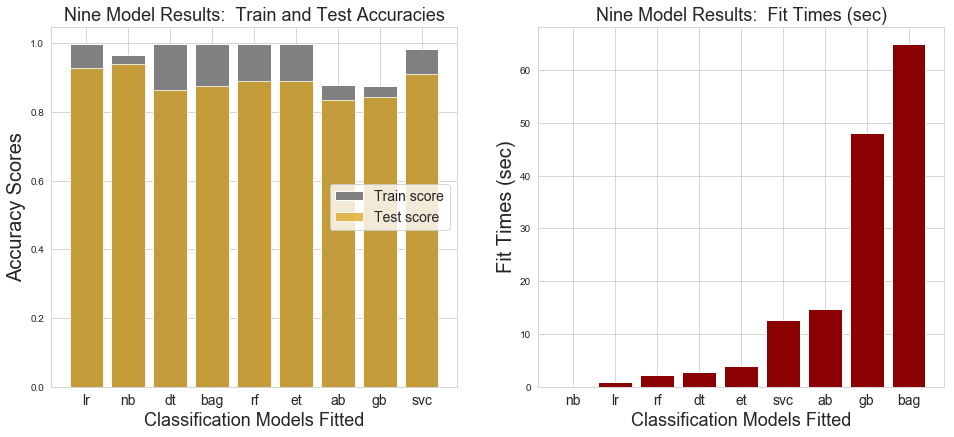

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
ax      = ax.ravel()
plt.subplots_adjust(bottom=0.00, top=1.00)

ax[0].bar(results_table.index, results_table.train_score, color='grey', alpha=1.00)
ax[0].bar(results_table.index, results_table.test_score, color='goldenrod', alpha=.75)

ax[0].set_title('Nine Model Results:  Train and Test Accuracies', fontsize=18)
ax[0].set_xlabel('Classification Models Fitted', fontsize=18)
ax[0].set_ylabel('Accuracy Scores', fontsize=20)
ax[0].set_xticklabels(labels=results_table.index, fontsize=14)
ax[0].legend(['Train score', 'Test score'], loc=7, fontsize=14)

ax[1].bar(results_table.index,
          results_table.fit_time.sort_values(ascending=True),
          color='darkred', alpha=1.00)
ax[1].set_title('Nine Model Results:  Fit Times (sec)', fontsize=18)
ax[1].set_xlabel('Classification Models Fitted', fontsize=18)
ax[1].set_ylabel('Fit Times (sec)', fontsize=20)
ax[1].set_xticklabels(fontsize=14,
                      labels=results_table.sort_values(by='fit_time',
                                                       ascending=True).index)

# plt.savefig('./data/nine_model_performance_ngrams2.jpg', bbox_inches='tight')
print()
plt.show();

<br/>[back to top](#Table-of-Contents)

---

### Hyper-parameter Tuning  

<font size='2'> 
&nbsp; &nbsp; The Naive-Bayes model doesn't really have hyper-parameters to tune, so looked at Logistic Regresssion and Random Forest Classifier<br> &nbsp; &nbsp; as candidates for additional tuning of hyper-parameters.  Did ***NOT*** do better than the baseline model instantiations above.  
</font>

In [49]:
lr2 = LogisticRegression(solver='liblinear', multi_class='auto')

lr2_params = {
             'penalty':    ['l1','l2'],
             'C':          [10, 1.0, 0.1]
            }

gs_lr2 = GridSearchCV(lr2, param_grid = lr2_params, cv=5)
gs_lr2.fit(X_train_vec, y_train)

print(f'GS_lr2 best score: {gs_lr2.best_score_:.6f}')
print(gs_lr2.best_params_)
print(f'\nGS_lr2 train score: {gs_lr2.score(X_train_vec, y_train):.6f}')
print(f'GS_lr2 test score: {gs_lr2.score(X_test_vec, y_test):.6f}')

GS_lr2 best score: 0.918112
{'C': 1.0, 'penalty': 'l2'}

GS_lr2 train score: 0.994220
GS_lr2 test score: 0.927850


In [50]:
rf2 = RandomForestClassifier(n_estimators=10, random_state=42)

rf2_params = {
             'n_estimators':     [34, 35, 36],
             'max_depth':        [None, 7],
             'max_features':     [90, 100, 110],
#              'min_sample_split': [2, 3]
            }

gs_rf2 = GridSearchCV(rf2, param_grid = rf2_params, cv=5)
gs_rf2.fit(X_train_vec, y_train)

print(f'GS_rf2 best score: {gs_rf2.best_score_:.6f}')
print(gs_rf2.best_params_)
print(f'\nGS_rf2 train score: {gs_rf2.score(X_train_vec, y_train):.6f}')
print(f'GS_rf2 test score: {gs_rf2.score(X_test_vec, y_test):.6f}')

GS_rf2 best score: 0.884875
{'max_depth': None, 'max_features': 100, 'n_estimators': 35}

GS_rf2 train score: 0.997592
GS_rf2 test score: 0.880231


<br/>[back to top](#Table-of-Contents)

---

### Wordclouds and Word Counts

In [51]:
terms_array = cvec.fit_transform(allposts_clean).toarray()
terms_df    = pd.DataFrame(terms_array, columns=cvec.get_feature_names())
terms_df.head()

,aachen,aaron,ab,ability,able,absolute,absolutely,abstract,aby,academic,...,young woman,younger,younglings,youtu,youtube,youtube channel,youtube com,zero,zombie,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
terms_df.insert(0, 'fact_col', allposts_df['fact'])

In [53]:
terms_df.shape

(2769, 5001)

In [54]:
top_factual_words = list(terms_df.groupby('target').sum().T.sort_values(by=1, ascending=False).head(50).index)
top_fiction_words = list(terms_df.groupby('target').sum().T.sort_values(by=0, ascending=False).head(50).index)

In [55]:
top_factual_words[1:9], top_fiction_words[1:9]

(['cowboy', 'man', 'stripe', 'ship', 'gladiator', 'men', 'brother', 'just'],
 ['http', 'wa', 'like', 'star', 'amp', 'com', 'just', 'book'])

<br/>
<b> <font size='3'>
The models work well on these two subreddits because, of the top 50 words in each class,<br>  
only 20% overlap...  
    
</font> </b>  



In [56]:
top_words_overlap = [w for w in top_factual_words if w in top_fiction_words]
top_wd_overlap_frac = len(top_words_overlap)/len(top_factual_words)
top_wd_overlap_frac

0.2

In [57]:
top_words_overlap

['wa', 'just', 've', 'planet', 'don', 'war', 'like', 'people', 'time', 'star']

In [58]:
factual_word_counts = terms_df.groupby('target').sum().T.sort_values(by=1, ascending=False)
fiction_word_counts = terms_df.groupby('target').sum().T.sort_values(by=0, ascending=False)

In [59]:
# from Andreas Mueller's code, via StackOverflow
# https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python

stopwords = set(STOPWORDS)

def gen_wordcloud(data, title=None, filename=None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=5
    ).generate(str(data))

    fig = plt.figure(1, figsize=(16, 16))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=32, color='r')
        fig.subplots_adjust(top=1.33)
    plt.imshow(wordcloud)
    
    if filename:
        plt.savefig(f'./data/{filename}', bbox_inches='tight')

    plt.show();

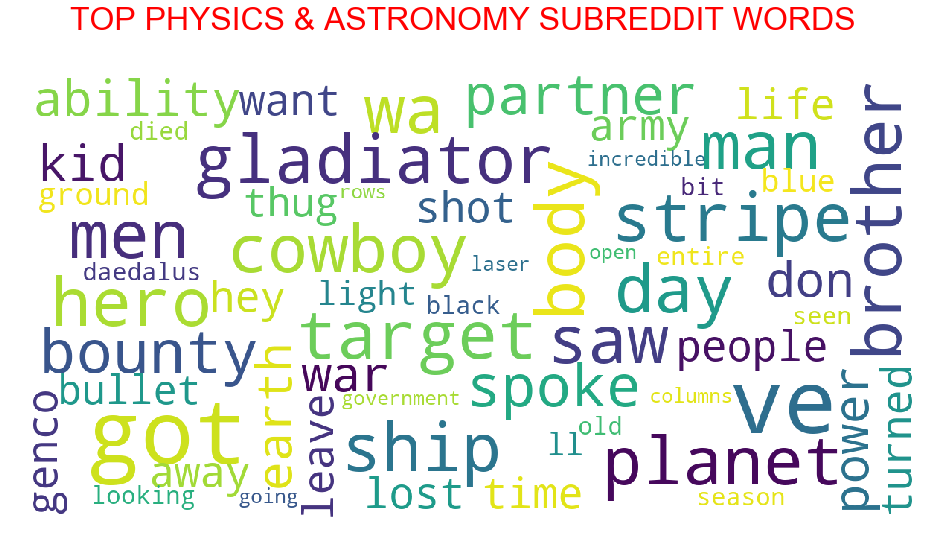

In [60]:
gen_wordcloud(factual_word_counts.iloc[0:100,1:],
              title='TOP PHYSICS & ASTRONOMY SUBREDDIT WORDS',
#               filename='factual_wordcloud.jpg'
             )

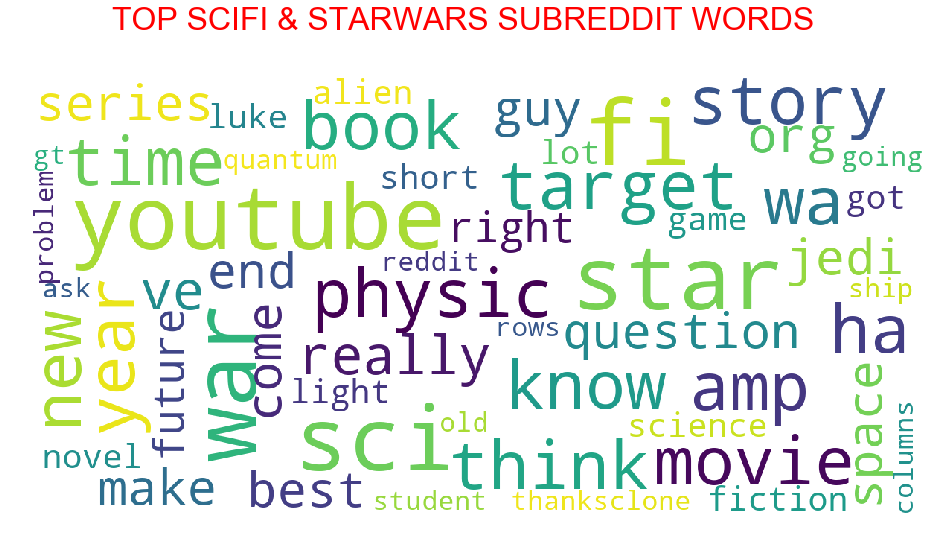

In [61]:
gen_wordcloud(fiction_word_counts.iloc[1:101,0:1],
              title='TOP SCIFI & STARWARS SUBREDDIT WORDS',
#               filename='fiction_wordcloud.jpg'
             )

In [62]:
factual_word_counts.iloc[0:15,1:]

target,1
wa,175
cowboy,109
man,56
stripe,45
ship,38
gladiator,36
men,32
brother,31
just,30
ve,24


In [63]:
fiction_word_counts.iloc[1:16,0:1]

target,0
http,720
wa,703
like,589
star,558
amp,556
com,479
just,470
book,458
physic,410
time,392


<br/>[back to top](#Table-of-Contents)

---

### Model Interpretations

In [64]:
lr.coef_

array([[ 1.63370033e-03,  2.25973047e-01,  1.71641353e-01, ...,
        -3.45227240e-01, -6.12875668e-06, -1.09218545e-05]])

In [65]:
nb.coef_

array([[-8.7789034 , -8.21928761, -7.96797318, ..., -9.47205058,
        -8.55575984, -7.96797318]])

<br/>[back to top](#Table-of-Contents)

---

### Conclusions